# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Christian Adi Ananta
- **Email:** chilllikehuman@gmail.com
- **ID Dicoding:** zachriss

## Menentukan Pertanyaan Bisnis

- Bagaimana performa perentalan sepeda pada kondisi cuaca tertentu?
- Bagaimana tingkat penyewaan sepeda di hari yang berbeda?


## Import Semua Packages/Library yang Digunakan

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### import day.csv

In [353]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Import hour.csv

In [354]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Checking if day.csv equals to hour.csv

In [355]:
test_hour_to_day_df = hour_df.groupby(by="dteday", as_index=False).agg({
  "temp" : "mean",
  "atemp" : "mean",
  "hum" : "mean",
  "windspeed" : "mean",
  "casual" : "sum",
  "registered" : "sum",
  "cnt" : "sum"
}).reset_index()
test_hour_to_day_df.head()


,index,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,2011-01-01,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,2011-01-02,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2,2011-01-03,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,3,2011-01-04,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,4,2011-01-05,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [356]:

test_day_df = day_df[["dteday",  "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].reset_index()
test_day_df.head()

,index,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,2011-01-01,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,2011-01-02,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2,2011-01-03,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,3,2011-01-04,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,4,2011-01-05,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### The data is already the same, so we will use the hour.csv for more detailed data

### Assessing Data

#### Checking The data generally with info()

In [357]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- The date is not in date datatype
- The date, year, and month attribute already have the same meaning, so it's redundant

#### Cheking any missing value

In [358]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Checking any duplicated data

In [359]:
print("Duplicated Data :", hour_df.duplicated().sum())

Duplicated Data : 0


#### Checking if there is abnormality between quantitative data

In [360]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Renaming Column for Better Understanding

In [361]:
hour_df.rename(columns={
  "instant" : "id",
  "dteday" : "date",
  "yr" : "year",
  "mnth" : "month",
  "hr" : "hour",
  "weathersit" : "weather",
  "hum" : "humidity",
  "cnt" : "count"
}, inplace=True)


#### Changing date column to take only its day and remove "date" column

In [362]:
hour_df["date"] = pd.to_datetime(hour_df["date"])
hour_df.insert(5, "day", hour_df["date"].dt.day)
hour_df.drop(columns=["date"])

,id,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,1,0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1,0,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1,0,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1,0,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1,0,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,31,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,1,1,12,31,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,1,1,12,31,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,1,1,12,31,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Modify the year column to match the actual year

In [363]:
#According to the Readme.txt from dataset, 0 = 2011 and 1 = 2012 
hour_df["year"] = hour_df["year"].apply(lambda x: x + 2011)

#### Checking the modified dataframe

In [364]:
hour_df.sample(5)

,id,date,season,year,month,day,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
16000,16001,2012-11-04,4,2012,11,4,9,0,0,0,1,0.32,0.3333,0.53,0.0000,56,161,217
16611,16612,2012-11-29,4,2012,11,29,22,0,4,1,1,0.26,0.2879,0.70,0.0896,4,147,151
6176,6177,2011-09-19,3,2011,9,19,22,0,1,1,2,0.56,0.5303,0.68,0.1642,25,104,129
606,607,2011-01-28,1,2011,1,28,12,0,5,1,3,0.18,0.2121,0.93,0.1045,1,28,29
2651,2652,2011-04-25,2,2011,4,25,9,0,1,1,1,0.60,0.5606,0.83,0.1343,27,147,174


## Exploratory Data Analysis (EDA)

### Explore ...

#### Count total of rental bikes by year

In [365]:
hour_df.groupby(by="year").agg({
  "count" : "sum"
})

,count
year,
2011,1243103
2012,2049576


berdasarkan hasil tersebut, dapat terlihat bahwa tahun 2012 memiliki jumlah penyewaan sepeda yang lebih tinggi dari tahun sebelumnya

#### Count total of rental bikes by month

In [366]:
hour_df.groupby(by="month").agg({
  "count" : ["mean", "sum"], 
})

count        
             mean     sum
month                    
1       94.424773  134933
2      112.865026  151352
3      155.410726  228920
4      187.260960  269094
5      222.907258  331686
6      240.515278  346342
7      231.819892  344948
8      238.097627  351194
9      240.773138  345991
10     222.158511  322352
11     177.335421  254831
12     142.303439  211036

Berdasarkan hasil tersebut, rata - rata penyewaan sepeda tertinggi berada pada bulan ke 9, sedangkan jumlah total penyewaan sepeda tertinggi berada pada bulan ke 8 


#### Average count of rental bikes by weekday

In [367]:
average_by_weekday = hour_df.groupby(by="weekday").agg({
  "count" : ["mean", "sum", "max", "min"]
})
average_by_weekday.rename(index={
  0: "Sunday",
  1: "Monday",
  2: "Tuesday",
  3: "Wednesday",
  4: "Thursday",
  5: "Friday",
  6: "Saturday"
}, inplace=True)
average_by_weekday

count                 
                 mean     sum  max min
weekday                               
Sunday     177.468825  444027  776   1
Monday     183.744655  455503  968   1
Tuesday    191.238891  469109  970   1
Wednesday  191.130505  473048  977   1
Thursday   196.436665  485395  976   1
Friday     196.135907  487790  957   1
Saturday   190.209793  477807  783   1

Dari hasil yang diperoleh, Rata-rata penyewaan sepeda tertinggi berada pada hari 4 (Kamis). Jumlah penyewaan sepeda tertinggi dimenangkan oleh hari 5(Jumat) sedangkan rekor penyewaan sepeda tertinggi dalam satu hari dimenangkan oleh hari 3 (Rabu)

#### Total count of rental bikes based on season

In [368]:
average_by_season = hour_df.groupby(by="season").agg({
  "count" : ["mean", "sum"]
})
average_by_season.rename(index={
  1: "Spring",
  2: "Summer",
  3: "Fall",
  4: "Winter"
}, inplace=True)
average_by_season

count         
              mean      sum
season                     
Spring  111.114569   471348
Summer  208.344069   918589
Fall    236.016237  1061129
Winter  198.868856   841613

Dari hasil yang diperoleh, Rata rata penyewaan sepeda tertinggi dan jumlah penyewaan sepeda terbanyak terdapat pada musim 3(musim gugur) 

#### Average count of rental bikes based on working day

In [369]:
average_by_working = hour_df.groupby(by="workingday").agg({
  "count" : ["mean", "max", "min", "sum"]
}).sort_values(by=("count", "mean"), ascending=False)
average_by_working.index = average_by_working.index.map({0:"no", 1:"yes"})
average_by_working

count                  
                  mean  max min      sum
workingday                              
yes         193.207754  977   1  2292410
no          181.405332  783   1  1000269

Dari hasil yang diperoleh, Penggunaan rata-rata rental sepeda lebih tinggi saat hari kerja

#### Average count of rental bikes based on weather

In [370]:
average_by_weather = hour_df.groupby(by="weather").agg({
  "count" : ["mean", "max", "min", "sum"]
}).sort_values(by=("count", "mean"), ascending=False)
average_by_weather.rename(index={
  1: "Clear",
  2: "Mist",
  3: "Light Rain",
  4: "Heavy Rain"
}, inplace=True)
average_by_weather

count                  
                  mean  max min      sum
weather                                 
Clear       204.869272  977   1  2338173
Mist        175.165493  957   1   795952
Light Rain  111.579281  891   1   158331
Heavy Rain   74.333333  164  23      223

Dari hasil yang diperoleh, cuaca nomor 1 (cuaca cerah) memiliki rata-rata penyewaan sepeda tertinggi. Selain itu, jumlah penyewaan sepeda dalam 1 hari serta total penyewaan sepeda juga berada pade cuaca nomor 1

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa perentalan sepeda pada kondisi cuaca tertentu?

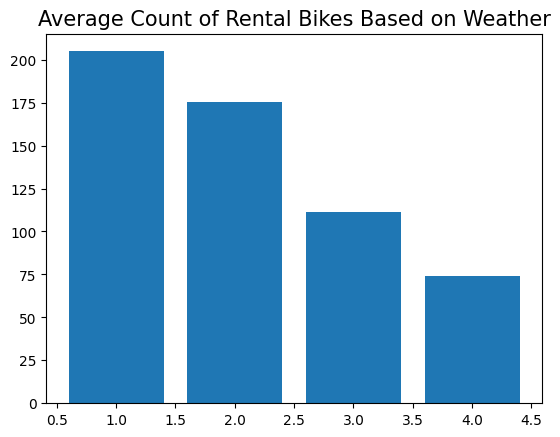

In [371]:
average_by_weather_df = hour_df.groupby(by="weather").agg({
  "count" : "mean"
}).sort_values(by="count", ascending=False).reset_index()
average_by_weather_df.rename(columns={
  "count" :"average"
}, inplace=True)

plt.bar(
  average_by_weather_df["weather"], 
  average_by_weather_df["average"],
)
plt.title("Average Count of Rental Bikes Based on Weather", loc="center", fontsize=15)
# plt.xticks(average_by_weather_df["weather"])
plt.show()

### Pertanyaan 2: Bagaimana tingkat penyewaan sepeda di hari yang berbeda?

In [372]:
average_by_day_df = hour_df.groupby(by="weekday").agg({
  "count" : "mean"
}).reset_index()
average_by_day_df.rename(columns={
  "count" : "average"
}, inplace=True)
average_by_day_df
# plt.bar(
#   average_by_day_df["weekday"], 
#   average_by_day_df["average"]
# )
# plt.title("Average Count of Rental Bikes Based on Weekdays", loc="center", fontsize=15)
# plt.xticks(rotation=45)
# plt.show()


,weekday,average
0,0,177.468825
1,1,183.744655
2,2,191.238891
3,3,191.130505
4,4,196.436665
5,5,196.135907
6,6,190.209793


## Conclusion

- Konklusi pertanyaan 1 : Semakin bagus kondisi cuaca, semakin tinggi pula rata-rata penyewaan sepeda
- Konklusi pertanyaan 2 : Hari Kamis dan Jumat memiliki Rata-rata penyewaan sepeda yang paling tinggi

In [373]:
hour_df["date"] = pd.to_datetime(hour_df["day"].astype(str) + "/" + hour_df["month"].astype(str) + "/" + hour_df["year"].astype(str), format="%d/%m/%Y")
tes = hour_df[hour_df["count"] == hour_df["count"].max()]
print(tes["weekday"].values[0])
# hour_df.to_csv("main_data.csv")
average_by_weather.info()

3
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Clear to Heavy Rain
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (count, mean)  4 non-null      float64
 1   (count, max)   4 non-null      int64  
 2   (count, min)   4 non-null      int64  
 3   (count, sum)   4 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 160.0+ bytes
